# Lecture 8

## Nathan Kunz

In [88]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import itertools
import scipy.stats as stats

## Organizing Panel Data

A panel data model takes rthe following form:

$$y_{it} = \beta_0 + \beta_{1} x_{1it} + \beta_{2} x_{2it}+...+ \beta_{k} x_{kit} + a_i + u_{it}$$

where $i$ is a subscript denoting an individual and $t$ denotes the time period an observation is taken. The error term is broken into a time invariant component $a_i$ and a time variant component $u_{it}$.

In [89]:
# We have three individuals
i = ["Larry", "Dean", "Sarah"]

# We take observations once a year
t = np.arange(2000, 2010)

# each individual is observed once a year
panel_example = pd.DataFrame(itertools.product(t,i), columns = ["year", "person"])

panel_example.head()

,year,person
0,2000,Larry
1,2000,Dean
2,2000,Sarah
3,2001,Larry
4,2001,Dean


In [90]:
panel_example["outcome"] = np.random.normal(0,1,30) 

In [91]:
panel_example["outcome"] = np.random.normal(0,1,30) 
panel_example.head()

,year,person,outcome
0,2000,Larry,0.015391
1,2000,Dean,-2.007057
2,2000,Sarah,-0.986986
3,2001,Larry,0.287144
4,2001,Dean,-1.565625


In [92]:
panel_example = panel_example.set_index(["year", "person"])
panel_example.head(10)

outcome
year person          
2000 Larry   0.015391
     Dean   -2.007057
     Sarah  -0.986986
2001 Larry   0.287144
     Dean   -1.565625
     Sarah  -1.379610
2002 Larry  -0.371715
     Dean    0.753867
     Sarah  -1.306796
2003 Larry   0.020681

This is a balanced panel, where all individuals are observed across all periods. Below is an example of an unbalanced panel, where we are missing an observation for Sarah in 2000 and Larry in 2008.

In [93]:
panel_example.drop([(2008, "Larry"), (2000, "Sarah")])

outcome
year person          
2000 Larry   0.015391
     Dean   -2.007057
2001 Larry   0.287144
     Dean   -1.565625
     Sarah  -1.379610
2002 Larry  -0.371715
     Dean    0.753867
     Sarah  -1.306796
2003 Larry   0.020681
     Dean    1.111457
     Sarah   2.019850
2004 Larry   0.947034
     Dean   -0.065941
     Sarah  -0.533885
2005 Larry   0.841981
     Dean   -1.613774
     Sarah   0.147892
2006 Larry   0.059638
     Dean   -1.600333
     Sarah   0.630479
2007 Larry   1.025922
     Dean    1.282638
     Sarah   0.698576
2008 Dean    1.282432
     Sarah  -0.384928
2009 Larry   1.285886
     Dean    0.858086
     Sarah   1.341894

## First Differenced Estimator

In [94]:
# There are two time periods
crime2 = woo.data('crime2')
crime2[["year", "area", "crmrte", "unem"]].head()

,year,area,crmrte,unem
0,82,44.599998,74.657562,8.2
1,87,44.599998,70.117294,3.7
2,82,375.000000,92.934868,8.1
3,87,375.000000,89.972214,5.4
4,82,49.799999,83.611130,9.0


In [95]:
crime2.year.unique()

array([82, 87], dtype=int64)

In [96]:
# create a time dummy
crime2['t'] = (crime2.year == 87)*1

In [100]:
# There are 46 different areas observed (i)
crime2['ids'] = crime2.area

In [101]:
crime2["crmrte_diff"] = crime2.groupby("ids")["crmrte"].diff()
crime2["unem_diff"] = crime2.groupby("ids")["unem"].diff()

In [115]:
crime2[["t","crmrte_diff", "unem_diff"]].dropna().head()

,t,crmrte_diff,unem_diff
1,1,-4.540268,-4.500000
3,1,-2.962654,-2.700000
5,1,-6.416374,-3.100000
7,1,-4.901543,-6.900001
9,1,-4.608994,-5.200000


In [102]:
model1 = smf.ols("crmrte ~ t + unem", crime2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5501
Date:                Thu, 01 Dec 2022   Prob (F-statistic):              0.579
Time:                        15:00:34   Log-Likelihood:                -441.90
No. Observations:                  92   AIC:                             889.8
Df Residuals:                      89   BIC:                             897.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.4202     12.739      7.333      0.000      68.107     118.733
t              7.9404      7.975      0.996      0.322      -7.906      23.787
unem           0.4265      1.188      0.359      0.720      -1.935       2.788
==============================================================================
Omnibus:                        8.350   Durbin-Watson:                   1.157
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.771
Skew:                           0.756   Prob(JB):                       0.0125
Kurtosis:                       2.935   Cond. No.                         40.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
fdiff = smf.ols("crmrte_diff ~ unem_diff", crime2).fit()
fdiff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            crmrte_diff   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     6.384
Date:                Thu, 01 Dec 2022   Prob (F-statistic):             0.0152
Time:                        15:00:34   Log-Likelihood:                -202.17
No. Observations:                  46   AIC:                             408.3
Df Residuals:                      44   BIC:                             412.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.4022      4.702      3.276      0.002       5.926      24.879
unem_diff      2.2180      0.878      2.527      0.015       0.449       3.987
==============================================================================
Omnibus:                        2.636   Durbin-Watson:                   1.146
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                2.255
Skew:                           0.539   Prob(JB):                        0.324
Kurtosis:                       2.883   Cond. No.                         8.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
import linearmodels as plm

In [105]:
crime2 = crime2.set_index(['ids', 'year'])

In [106]:
plm.FirstDifferenceOLS.from_formula(formula = 'crmrte ~ unem', data = crime2).fit()

C:\Users\kunzn\anaconda3\lib\site-packages\linearmodels\shared\utility.py:187: FutureWarning: In a future version of pandas all arguments of MultiIndex.set_levels except for the argument 'levels' will be keyword-only
  df.index = df.index.set_levels(final_levels, [0, 1])


Dep. Variable:,crmrte,R-squared:,1.964e-05
Estimator:,FirstDifferenceOLS,R-squared (Between):,-0.0027
No. Observations:,46,R-squared (Within):,1.964e-05
Date:,"Thu, Dec 01 2022",R-squared (Overall):,-0.0026
Time:,15:00:36,Log-likelihood,-207.19
Cov. Estimator:,Unadjusted,,
,,F-statistic:,0.0009
Entities:,46,P-value,0.9764
Avg Obs:,2.0000,Distribution:,"F(1,45)"
Min Obs:,2.0000,,
Max Obs:,2.0000,F-statistic (robust):,0.0009


## Within Estimator

In [107]:
crime2 = crime2.reset_index()

In [108]:
Y = "crmrte"
X = ["unem", "t"]

mean_data = crime2.groupby("ids")[X+[Y]].mean()
mean_data.head()

,unem,t,crmrte
ids,,,
13.000000,11.30,0.5,68.506205
17.799999,5.75,0.5,166.898941
18.900000,7.60,0.5,108.058220
20.799999,4.95,0.5,142.893265
21.900000,6.55,0.5,71.647846


In [109]:
demeaned_data = (crime2.set_index("ids")[X+[Y]] - mean_data) # subtract the mean data
demeaned_data.head()

,unem,t,crmrte
ids,,,
13.000000,3.60,-0.5,4.807211
13.000000,-3.60,0.5,-4.807211
17.799999,3.35,-0.5,2.416580
17.799999,-3.35,0.5,-2.416580
18.900000,3.70,-0.5,-11.970970


In [110]:
crime2["crmrte_demmean"] = crime2.crmrte - crime2.groupby("ids", axis=0).transform('mean')["crmrte"]
crime2["unem_demmean"] = crime2.unem - crime2.groupby("ids", axis=0).transform('mean')["unem"]

In [111]:
mod = smf.ols('crmrte ~ t+unem-1', data=demeaned_data).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 crmrte   R-squared (uncentered):                   0.196
Model:                            OLS   Adj. R-squared (uncentered):              0.178
Method:                 Least Squares   F-statistic:                              10.97
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    5.43e-05
Time:                        15:00:42   Log-Likelihood:                         -340.57
No. Observations:                  92   AIC:                                      685.1
Df Residuals:                      90   BIC:                                      690.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
t             15.4022      3.288      4.685      0.000       8.871      21.934
unem           2.2180      0.614      3.614      0.000       0.999       3.437
==============================================================================
Omnibus:                        0.005   Durbin-Watson:                   2.890
Prob(Omnibus):                  0.998   Jarque-Bera (JB):                0.053
Skew:                           0.000   Prob(JB):                        0.974
Kurtosis:                       2.883   Cond. No.                         8.70
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
crime2 = crime2.set_index(['ids', 'year'], drop = False)

In [117]:
# Drop absorbed drops any variables that do not change over time (ethnicity would be an example)
fe_fit = plm.PanelOLS.from_formula(formula = 'crmrte ~ t+ unem + EntityEffects',
                                   data = crime2, drop_absorbed = True).fit()
fe_fit

Dep. Variable:,crmrte,R-squared:,0.1961
Estimator:,PanelOLS,R-squared (Between):,0.4064
No. Observations:,92,R-squared (Within):,0.1961
Date:,"Thu, Dec 01 2022",R-squared (Overall):,0.4041
Time:,15:11:26,Log-likelihood,-340.57
Cov. Estimator:,Unadjusted,,
,,F-statistic:,5.3653
Entities:,46,P-value,0.0082
Avg Obs:,2.0000,Distribution:,"F(2,44)"
Min Obs:,2.0000,,
Max Obs:,2.0000,F-statistic (robust):,5.3653


### Dummy variable Regression

In [23]:
smf.ols(formula = 'crmrte ~ t+ unem + C(ids)', data = crime2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     7.642
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.70e-10
Time:                        11:44:37   Log-Likelihood:                -340.57
No. Observations:                  92   AIC:                             777.1
Df Residuals:                      44   BIC:                             898.2
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       35.7417     15.515      2.304      0.026       4.473      67.010
C(ids)[T.17.799999237060547]   110.7026     14.992      7.384      0.000      80.489     140.917
C(ids)[T.18.899999618530277]    47.7586     14.545      3.283      0.002      18.444      77.073
C(ids)[T.20.799999237060547]    88.4714     15.235      5.807      0.000      57.768     119.175
C(ids)[T.21.899999618530277]    13.6771     14.779      0.925      0.360     -16.107      43.461
C(ids)[T.24.100000381469727]    51.7858     14.231      3.639      0.001      23.105      80.467
C(ids)[T.24.200000762939453]    24.2242     15.006      1.614      0.114      -6.019      54.467
C(ids)[T.25.299999237060547]    48.2313     14.978      3.220      0.002      18.046      78.417
C(ids)[T.27.399999618530277]    30.3498     14.791      2.052      0.046       0.540      60.159
C(ids)[T.34.20000076293945]     43.7282     14.545      3.006      0.004      14.414      73.042
C(ids)[T.34.29999923706055]     85.1854     14.315      5.951      0.000      56.335     114.035
C(ids)[T.41.79999923706055]      7.3826     14.205      0.520      0.606     -21.246      36.011
C(ids)[T.44.59999847412109]     15.7475     14.936      1.054      0.297     -14.353      45.848
C(ids)[T.46.400001525878906]    27.7747     14.730      1.886      0.066      -1.912      57.461
C(ids)[T.49.79999923706055]     20.4360     14.575      1.402      0.168      -8.939      49.811
C(ids)[T.52.900001525878906]    28.3713     14.950      1.898      0.064      -1.758      58.500
C(ids)[T.53.0]                  17.4695     14.754      1.184      0.243     -12.265      47.204
C(ids)[T.54.400001525878906]    49.5983     14.181      3.497      0.001      21.018      78.179
C(ids)[T.55.09999847412109]     56.3623     14.992      3.760      0.000      26.148      86.576
C(ids)[T.55.29999923706055]     59.3131     14.239      4.166      0.000      30.616      88.010
C(ids)[T.55.400001525878906]    11.4640     14.327      0.800      0.428     -17.411      40.339
C(ids)[T.55.900001525878906]    34.2429     14.779      2.317      0.025       4.459      64.027
C(ids)[T.61.09999847412109]      8.9101     14.354      0.621      0.538     -20.018      37.838
C(ids)[T.74.0]                  22.7542     14.303      1.591      0.119      -6.072      51.580
C(ids)[T.78.0]                  15.8335     14.261      1.110      0.273     -12.908      44.575
C(ids)[T.79.0]                  20.3167     14.179      1.433      0.159      -8.260      48.893
C(ids)[T.95.8000030517578]      12.4704     14.266      0.874      0.387     -16.280      41.221
C(ids)[T.97.3000030517578]      40.2455     14.224      2.829      0.007      11.579      68.912
C(ids)[T.100.5]                 60.1289     14.606      4.117      0.000    

## Random Effects

Random effects assumes that the unobserved heterogeneity $a_i$ are uncorrelated with the regressors. If this is true, then we could simply run ols on our data as if it was a cross section. 

However the errors in our model will be serially correlated across time, which means the standard errors in our model will be incorrect.

Consider the model from earlier:

$$crmrte_{it} = \beta_0 + \beta_1 unem_{it} + a_i + u_{it}$$

where $v_{it}= a_i + u_{it}$ is the composite error term. If our random effects assumptions hold, then:
$cov(x_{itj}, a_i) = 0$  for all $t = 0, 1, ..., T$ and $j = 1,2,...,k$.
 
Unfortunately, one of our assumptions to derive correct standard errors is that there is no serial correlation across time. This can't be true, since $a_i$ is included in the composite error term. In fact, under the ranedom effects assumptions:

$$cov(v_{it}, v_{is}) = \frac{\sigma^2_a}{\sigma^2_a+\sigma^2_u}$$ $$t \neq s$$

GLS can be used to solve the serial correlation problem.

In [43]:
reg_re = plm.RandomEffects.from_formula(formula = 'crmrte ~ 1+ t  + unem', data = crime2).fit()
reg_re

Dep. Variable:,crmrte,R-squared:,0.0927
Estimator:,RandomEffects,R-squared (Between):,-0.0320
No. Observations:,92,R-squared (Within):,0.1911
Date:,"Thu, Dec 01 2022",R-squared (Overall):,-0.0017
Time:,11:56:44,Log-likelihood,-372.87
Cov. Estimator:,Unadjusted,,
,,F-statistic:,4.5472
Entities:,46,P-value,0.0132
Avg Obs:,2.0000,Distribution:,"F(2,89)"
Min Obs:,2.0000,,
Max Obs:,2.0000,F-statistic (robust):,4.5472


## Hauseman Test For Endogeneity

The random effects estimates aere reliable under the assumption that individual characteristics are exogenous (I.e. they are independent wrt to the resgressors). We have already used the Hausman test duruing the IV lecture to check for endogeneity, and it can be applied in this context as well. 

The null hypothesis of the test is that individual random effects are exogenous. The test compares the random and fixed effects models.

In [45]:
ch3 = pd.read_csv("chemical3.csv", parse_dates = True)
ch3 = ch3.set_index(["firm", "year"])

In [47]:
reg_re = plm.RandomEffects.from_formula(formula = 'lsales ~ 1+ lcapital + llabor', data = ch3).fit()
fe_fit = plm.PanelOLS.from_formula(formula = 'lsales ~ lcapital + llabor + EntityEffects', data = ch3, drop_absorbed = True).fit()


In [53]:
reg_re = plm.RandomEffects.from_formula(formula = 'crmrte ~ 1+ t  + unem', data = crime2).fit()
fe_fit = plm.PanelOLS.from_formula(formula = 'crmrte ~ t+ unem + EntityEffects',
                                   data = crime2, drop_absorbed = True).fit()

(98.81660543073161, 2, 3.485353000599886e-22)

In [52]:
def PnlHausman(fe_fit, re_fit):
    # pull out the variances and parameters for test
    Dcov = fe_fit.cov - re_fit.cov.iloc[1:, 1:]
    dparams = fe_fit.params - re_fit.params[1:]
    # get the test statistic
    Chi2 = dparams.dot(np.linalg.inv(Dcov)).dot(dparams)
    # calculate the degrees of freedom
    dof = re_fit.params.size - 1
    # calculate the p-value
    pvalue = stats.chi2(dof).sf(Chi2)
    return(Chi2, dof, pvalue)
    

In [115]:
# We fail to reject the null hypothesis of exogeneity
# Random effects may be appropriate
PnlHausman(fe_fit, reg_re)

(1.7882988651011655, 2, 0.40895529481239756)

## LImited Dependent Variable Models}

In [119]:
# replace data
data = pd.read_csv("transport.csv")

In [121]:
data.head()

,autotime,bustime,dtime,auto
0,52.9,4.4,-4.85,0
1,4.1,28.5,2.44,0
2,4.1,86.9,8.28,1
3,56.2,31.6,-2.46,0
4,51.8,20.2,-3.16,0


### Linear Probability Model

In [124]:
ols1 = smf.ols('auto ~ dtime', data).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   auto   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     29.88
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           2.83e-05
Time:                        18:55:58   Log-Likelihood:                -5.2951
No. Observations:                  21   AIC:                             14.59
Df Residuals:                      19   BIC:                             16.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4848      0.071      6.785      0.000       0.335       0.634
dtime          0.0703      0.013      5.467      0.000       0.043       0.097
==============================================================================
Omnibus:                        2.283   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.319   Jarque-Bera (JB):                0.807
Skew:                           0.293   Prob(JB):                        0.668
Kurtosis:                       3.761   Cond. No.                         5.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
ols1.fittedvalues.values 

array([ 0.14379198,  0.65635127,  1.06696118,  0.31183268,  0.26261573,
        1.12461531,  0.85110974, -0.1318229 ,  0.36526821,  0.122699  ,
       -0.15291587,  0.94532502,  0.17543144,  0.43557813,  0.84759424,
        0.7125992 ,  0.05027979,  0.72384879,  0.68095974, -0.02776422,
        0.83564155])

In [65]:
# we can still assign them a value based on some cutoff
np.where(ols1.fittedvalues >.5, 1, 0)

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

### Logit 

In [128]:
logit = smf.logit('auto ~ dtime', data).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.293621
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   auto   No. Observations:                   21
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                            1
Date:                Thu, 01 Dec 2022   Pseudo R-squ.:                  0.5757
Time:                        19:19:13   Log-Likelihood:                -6.1660
converged:                       True   LL-Null:                       -14.532
Covariance Type:            nonrobust   LLR p-value:                 4.304e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2376      0.750     -0.317      0.752      -1.708       1.233
dtime          0.5311      0.206      2.573      0.010       0.127       0.936
==============================================================================
"""

Interpretation of the coefficients

### Probit

In [129]:
probit1 = smf.probit('auto ~ dtime', data).fit(disp = 0)
probit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   auto   No. Observations:                   21
Model:                         Probit   Df Residuals:                       19
Method:                           MLE   Df Model:                            1
Date:                Thu, 01 Dec 2022   Pseudo R-squ.:                  0.5758
Time:                        19:19:14   Log-Likelihood:                -6.1652
converged:                       True   LL-Null:                       -14.532
Covariance Type:            nonrobust   LLR p-value:                 4.300e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0644      0.399     -0.161      0.872      -0.847       0.718
dtime          0.3000      0.103      2.916      0.004       0.098       0.502
==============================================================================
"""

### Probit and Logit Coefficient Interpretations

In [143]:

logit.params[1]

0.5310982746578312

In [154]:
beta_j = logit.params[1]
linear = logit.fittedvalues[0]
partial= logit.params[1]*stats.logistic.pdf(linear)

# the partial effect of x_j on y changes depending on the values of the other regressors
print("The approximate change in the probability that someone will commute in a car at " + 
      str(linear), "is " + str(partial))

The approximate change in the probability that someone will commute in a car at -2.8134020769391905 is 0.02836075171600828


In [155]:
beta_j = logit.params[1]
linear = logit.fittedvalues[2]
partial= logit.params[1]*stats.logistic.pdf(linear)

# Note that the increase in probability is much smaller
print("The approximate change in the probability that someone will commute in a car at " + 
      str(linear), "is " + str(partial))

The approximate change in the probability that someone will commute in a car at 4.1599182693181325 is 0.008036971009232381


In [191]:
logit_pea = logit.params*stats.logistic.pdf(logit.params[0] + logit.params[1]*data.dtime.mean())
probit_pea = probit1.params*stats.norm.pdf(probit1.params[0] + probit1.params[1]*data.dtime.mean())

print("Logistic APE: ", logit_pea, "Probit PEA: ", probit_pea)

Logistic APE:  Intercept   -0.058055
dtime        0.129781
dtype: float64 Probit PEA:  Intercept   -0.025574
dtime        0.119068
dtype: float64


In [192]:
probit_ape = probit1.params*stats.norm.pdf(probit1.fittedvalues).mean()
logit_ape = logit.params*stats.logistic.pdf(logit.fittedvalues).mean()

print("Probit APE: ", probit_ape, "Probit PEA: ", logit_ape)

Probit APE:  Intercept   -0.010397
dtime        0.048407
dtype: float64 Probit PEA:  Intercept   -0.020646
dtime        0.046154
dtype: float64


## Marginal Effects (Automatically calculate the APE)

In [189]:
probit1.get_margeff().margeff

array([0.04840694])

In [190]:
logit.get_margeff().margeff

array([0.04615397])

### Probit and Logit Prediction

$$P(y= 1|x) = G(\beta_0 +\beta_1 x_1 +...+\beta_k x_k)$$

- where $G(z)=\frac{exp(z)}{1+exp(z)}$ for logit models
- where $G(z)=\frac{1}{\sqrt{2 \pi}}e^{-\frac{1}{2}({z})^2}$ for for probit models (is the standard normal cdf)

There are three separate prediction methods to be aware of for fitted logit and probit models:

- results.fittedvalues gives $x_i\hat{\beta}$. Note that these are not probabilities, but the linear part of the model before it is transformed by the link function.
- results.predict() gives $G(x_i\hat{\beta})$ which are the probabilities for the fitted values of the function. 
- results.predict(newdata) gives $G(x_i\hat{\beta})$ which are the probabilities for new data from the function. 


### Logit prediction 

In [132]:
# below we have the fitetd values from the logit model
# note these are not probabilities
print(logit.fittedvalues.min())
print(logit.fittedvalues.max())

-5.054636795995239
4.595418854537554


In [133]:
# we can plug the fitted values into the link function to get probabilities
(np.exp(logit.fittedvalues)/(1+np.exp(logit.fittedvalues)))

0     0.056604
1     0.742366
2     0.984631
3     0.175943
4     0.128326
5     0.990003
6     0.926181
7     0.007426
8     0.242239
9     0.048673
10    0.006339
11    0.962353
12    0.070804
13    0.352209
14    0.924344
15    0.815053
16    0.028755
17    0.827521
18    0.776292
19    0.016154
20    0.917783
dtype: float64

In [134]:
logit.predict() 

array([0.05660423, 0.74236637, 0.98463106, 0.17594335, 0.12832551,
       0.99000296, 0.92618052, 0.00742605, 0.24223912, 0.04867308,
       0.00633924, 0.96235264, 0.07080376, 0.3522088 , 0.92434429,
       0.81505287, 0.02875512, 0.82752096, 0.77629228, 0.01615431,
       0.91778346])

In [160]:
# create some new values to predict with the same 
# regressor names
newdata = pd.DataFrame([-1,2,3,4], columns = ["dtime"])

In [161]:
logit.predict(newdata) 

0    0.316766
1    0.695216
2    0.795063
3    0.868392
dtype: float64

In [162]:
np.isclose((np.exp(logit.fittedvalues)/(1+np.exp(logit.fittedvalues))), logit.predict())[:20]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

### Probit Prediction

In [34]:
import scipy.stats as stats

# convert to probabilities
stats.norm.cdf(probit1.fittedvalues)[:10]

array([0.61478336, 0.57195901, 0.60921791, 0.6348224 , 0.56892911,
       0.61993933, 0.62339582, 0.61483263, 0.58300447, 0.60484237])

In [35]:
# get the probabilities for teh fitted values
probit1.predict()[:10]

array([0.61478336, 0.57195901, 0.60921791, 0.6348224 , 0.56892911,
       0.61993933, 0.62339582, 0.61483263, 0.58300447, 0.60484237])

In [163]:
# predict new values
probit1.predict(newdata)

0    0.357771
1    0.703864
2    0.798292
3    0.871922
dtype: float64

In [164]:
# Set a threshold where we will predict 1 if the probability is greater than .5
np.where(probit1.predict(newdata) >.5, 1, 0)

array([0, 1, 1, 1])

### Confusion Matrix

In [181]:
from sklearn.metrics import confusion_matrix
predictions = np.where(logit.predict() > .5, 1, 0)
cm = confusion_matrix(actual, predictions)\
actual = data.auto
cm

array([[10,  1],
       [ 1,  9]], dtype=int64)

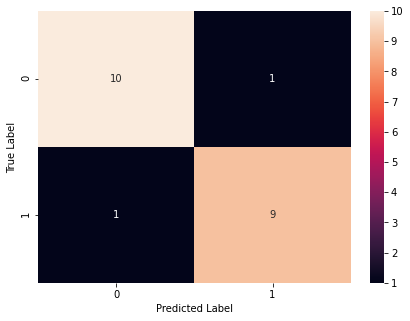

In [188]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
def 

### Multinomial Logit

In [193]:
nels = pd.read_csv("nels.csv")


In [194]:
results_mn = smf.mnlogit('psechoice ~ grades', nels).fit(disp = 0)

In [73]:
results_mn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              psechoice   No. Observations:                 6649
Model:                        MNLogit   Df Residuals:                     6645
Method:                           MLE   Df Model:                            2
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.1360
Time:                        16:35:10   Log-Likelihood:                -5869.6
converged:                       True   LL-Null:                       -6793.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
psechoice=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.5015      0.157     15.955      0.000       2.194       2.809
grades         -0.2945      0.020    -14.938      0.000      -0.333      -0.256
-------------------------------------------------------------------------------
psechoice=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.6268      0.153     36.794      0.000       5.327       5.927
grades         -0.6910      0.020    -34.141      0.000      -0.731      -0.651
===============================================================================
"""

In [205]:
me = results_mn.get_margeff(at =  'overall', method = 'dydx')

In [206]:
# get the APE of the predictors for each level
# hypothesis test are automatically computed
me.summary_frame()

,,dy/dx,Std. Err.,z,Pr(>|z|),Conf. Int. Low,Cont. Int. Hi.
endog,exog,,,,,,
psechoice=1,grades,0.069040,0.001969,35.064846,2.316117e-269,0.065181,0.072899
psechoice=2,grades,0.028805,0.002102,13.702720,9.779134e-43,0.024685,0.032925
psechoice=3,grades,-0.097845,0.001671,-58.537530,0.000000e+00,-0.101121,-0.094569


In [219]:
# each colyumn represents the prbability y takes a given value
results_mn.predict()[:3]

array([[0.42276441, 0.35590784, 0.22132775],
       [0.33928751, 0.3583217 , 0.30239078],
       [0.24869707, 0.34134015, 0.40996277]])

In [216]:
results_mn.predict().argmax(axis = 1)[:10]

array([0, 1, 2, 2, 2, 2, 0, 0, 0, 2], dtype=int64)